In [1]:
import numpy as np
import pandas as pd
from collections import Counter 
import matplotlib.pyplot as plt
import math

In [2]:
data_business = pd.read_csv('/Users/vikaschaturvedi/Documents/T-Systems/POC/Recommender/Yelp-Recommender-master/data/interim/business_atlanta.csv')

In [3]:
category_frequency = []
num_tags = []

for i in range(data_business.shape[0]):
    each_line = data_business['category'][i].split(", ")
    for content in each_line:
        category_frequency.append(content)
        num_tags.append(len(content))

In [4]:
sum(num_tags) / len(num_tags)

10.170074982958418

In [5]:
data_business.business_id.describe()

count                       5078
unique                      5078
top       z8-_6l5EhX5NuPfWzJYQMA
freq                           1
Name: business_id, dtype: object

In [20]:
Counter(category_frequency)

Counter({'Food': 2005,
         'Restaurants': 4179,
         'Cheesesteaks': 44,
         'Sandwiches': 616,
         'Juice Bars & Smoothies': 146,
         'Patisserie/Cake Shop': 11,
         'Desserts': 288,
         'Cupcakes': 30,
         'Bakeries': 245,
         'Chinese': 188,
         'Caribbean': 87,
         'Cuban': 31,
         'Fast Food': 456,
         'American (Traditional)': 608,
         'Salad': 260,
         'Southern': 244,
         'Nightlife': 946,
         'Mexican': 327,
         'Bars': 900,
         'Sports Bars': 146,
         'Tex-Mex': 102,
         'Caterers': 214,
         'Event Planning & Services': 344,
         'Latin American': 61,
         'Tapas Bars': 75,
         'Brazilian': 14,
         'American (New)': 682,
         'Barbeque': 151,
         'Lounges': 145,
         'Burgers': 380,
         'Vietnamese': 53,
         'Beer': 207,
         'Wine & Spirits': 207,
         'Grocery': 157,
         'Cheese Shops': 8,
         'Specialty Food

In [15]:
print('Total different categories:')
len(Counter(category_frequency))

Total different categories:


430

In [21]:
new_feature = Counter(category_frequency).most_common(60)

feature = pd.DataFrame()
for ind,val in enumerate(new_feature[2:]):
    feature.loc[ind,'Feature'] = val[0]
    feature.loc[ind,'IDF'] =  math.log1p(len(data_business.business_id) / val[1])

In [22]:
data_business2 = data_business

In [23]:
for tag in range(feature.shape[0]):
    ft = feature.loc[tag,'Feature']
    for i in range(data_business2.shape[0]):
        each_line = data_business2['category'][i].split(", ")
        if ft in each_line:
            data_business2.loc[i,ft] = 1 
        else:
            data_business2.loc[i,ft] = 0

In [34]:
data_business2.describe()
data_business2.to_csv('/Users/vikaschaturvedi/Documents/T-Systems/POC/Recommender/Yelp-Recommender-master/data/interim/atlanta_business_Nora2.csv',index=False)

In [37]:
print(data_business2.shape)
data_business2.head()

(5078, 84)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Caribbean,Thai,Soul Food,Tapas Bars,Food Trucks,Drugstores,Tapas/Small Plates,Soup,Food Delivery Services,Automotive
0,z8-_6l5EhX5NuPfWzJYQMA,Great Wraps,3393 Peachtree Rd NE,Atlanta,GA,30326.0,33.846335,-84.363578,3.0,11,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Q2vefh0tGhtCGQDK1FI7cw,Piece of Cake,3215 Roswell Rd NE,Atlanta,GA,30305.0,33.842875,-84.378539,4.0,231,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TbZDLpBOl-EbO2LfMySrEg,First China Restaurant,5295 Buford Hwy NE,Atlanta,GA,30340.0,33.896640,-84.280918,3.0,11,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,bP6goJODwRnM3AVy45Kn9w,Papi's Cuban & Caribbean Grill,216 Ponce De Leon Ave NE,Atlanta,GA,30308.0,33.772758,-84.380375,4.0,1001,...,1.361251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,yCeENvVAGQQ0PeeWU0Pl2g,Nature's Table Bistro,"6000 N Terminal Pkwy, Concourse E Centrepoint,...",Atlanta,GA,30320.0,33.640879,-84.425514,3.5,150,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
new_feature = Counter(category_frequency).most_common(1000)
newdt = pd.DataFrame(new_feature)
newdt.describe()


,1
count,430.000000
mean,54.586047
std,244.437761
min,1.000000
25%,1.000000
50%,5.000000
75%,25.000000
max,4179.000000


In [27]:
new_feature

[('Restaurants', 4179),
 ('Food', 2005),
 ('Nightlife', 946),
 ('Bars', 900),
 ('American (New)', 682),
 ('Sandwiches', 616),
 ('American (Traditional)', 608),
 ('Coffee & Tea', 485),
 ('Fast Food', 456),
 ('Breakfast & Brunch', 434),
 ('Burgers', 380),
 ('Event Planning & Services', 344),
 ('Mexican', 327),
 ('Pizza', 323),
 ('Desserts', 288),
 ('Specialty Food', 285),
 ('Seafood', 277),
 ('Chicken Wings', 270),
 ('Salad', 260),
 ('Italian', 246),
 ('Bakeries', 245),
 ('Southern', 244),
 ('Cafes', 228),
 ('Shopping', 225),
 ('Caterers', 214),
 ('Beer', 207),
 ('Wine & Spirits', 207),
 ('Chinese', 188),
 ('Cocktail Bars', 183),
 ('Asian Fusion', 172),
 ('Ice Cream & Frozen Yogurt', 167),
 ('Grocery', 157),
 ('Sushi Bars', 156),
 ('Japanese', 154),
 ('Barbeque', 151),
 ('Juice Bars & Smoothies', 146),
 ('Sports Bars', 146),
 ('Lounges', 145),
 ('Delis', 140),
 ('Mediterranean', 133),
 ('Vegetarian', 128),
 ('Steakhouses', 126),
 ('Arts & Entertainment', 123),
 ('Convenience Stores', 115

(array([420.,   6.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([1.0000e+00, 4.1880e+02, 8.3660e+02, 1.2544e+03, 1.6722e+03,
        2.0900e+03, 2.5078e+03, 2.9256e+03, 3.3434e+03, 3.7612e+03,
        4.1790e+03]),
 <BarContainer object of 10 artists>)

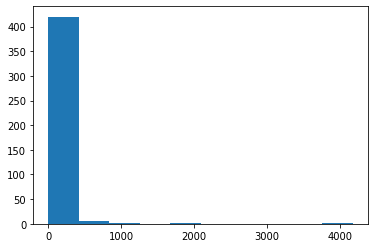

In [28]:
plt.hist(newdt[1])

In [31]:
newdt[:100]

,0,1
0,Restaurants,4179
1,Food,2005
2,Nightlife,946
3,Bars,900
4,American (New),682
...,...,...
95,Cuban,31
96,Cupcakes,30
97,African,30
98,Active Life,30


In [32]:
feature.head(5)

,Feature,IDF
0,Nightlife,1.851264
1,Bars,1.893447
2,American (New),2.133663
3,Sandwiches,2.223921
4,American (Traditional),2.235587


In [33]:
for tag in range(feature.shape[0]):
    ft = feature.loc[tag,'Feature']
    idf = feature.loc[tag,'IDF']
    for i in range(data_business.shape[0]):
        each_line = data_business['category'][i].split(", ")
        if ft in each_line:
            data_business.loc[i,ft] = 1 / len(each_line) * idf
        else:
            data_business.loc[i,ft] = 0

In [35]:
data_business.to_csv('/Users/vikaschaturvedi/Documents/T-Systems/POC/Recommender/Yelp-Recommender-master/data/interim/atlanta_business_Nora.csv')

In [36]:
data_business.describe()

,postal_code,latitude,longitude,stars,review_count,Nightlife,Bars,American (New),Sandwiches,American (Traditional),...,Caribbean,Thai,Soul Food,Tapas Bars,Food Trucks,Drugstores,Tapas/Small Plates,Soup,Food Delivery Services,Automotive
count,5074.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,...,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000
mean,30323.011431,33.796576,-84.381500,3.453427,121.820205,0.053511,0.052033,0.062476,0.059309,0.054736,...,0.019015,0.020357,0.016000,0.012050,0.012559,0.010398,0.009810,0.009703,0.010136,0.011219
std,50.292763,0.069653,0.048996,0.799132,231.844023,0.117847,0.117989,0.184808,0.177529,0.167789,...,0.162254,0.171153,0.135630,0.113282,0.114396,0.089858,0.090289,0.089417,0.099310,0.102287
min,30030.000000,33.601442,-84.549591,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30308.000000,33.756026,-84.403989,3.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30318.000000,33.786542,-84.380779,3.500000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30329.000000,33.846222,-84.354288,4.000000,131.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31136.000000,33.949424,-84.205442,5.000000,3861.000000,0.617088,0.631149,1.066832,1.111961,1.117794,...,2.041876,2.047560,2.065023,2.114923,2.114923,1.060769,2.148934,1.451977,2.193157,1.096579


In [19]:
data_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Halal,Gluten-Free,Food Delivery Services,Wine Bars,Delis,Health Markets,Tea Rooms,Sports Bars,Gastropubs,Tapas/Small Plates
0,C9oCPomVP0mtKa8z99E3gg,Bakery Gateau,"865 York Mills Road, Unit 1",Toronto,ON,M3B 1Y6,43.754093,-79.349548,4.5,8,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,NDuUMJfrWk52RA-H-OtrpA,Bolt Fresh Bar,1170 Queen Street W,Toronto,ON,M6J 1J5,43.642889,-79.425429,3.0,57,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,SP_YXIEwkFPPl_9anCYmpQ,The Steady Cafe & Bar,1051 Bloor Street W,Toronto,ON,M6H 1M4,43.660494,-79.432099,3.5,29,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,mlHC2XcU9Bows6cnYEmRgg,Mad Crush Wine Bar,582 College Street,Toronto,ON,M6G 1B3,43.655420,-79.413352,4.0,9,...,0.0,0.0,0.0,0.727477,0.0,0.0,0.0,0.0,0.0,0.0
4,RFbMVekR8lU9tPJ8sWrwHg,Tavolino,619 Mount Pleasant Road,Toronto,ON,M4S 2M5,43.704229,-79.388230,4.0,18,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
